<a href="https://colab.research.google.com/github/bhowad-akash/Data-Analysis-with-Pandas/blob/main/Simple_Image_Classifier_using_MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.15.0
2.15.0


Using Fashion MNIST dataset privided by Keras

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
#Normalizing the data by scaling pixel values from the range 0-255 to the range of 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

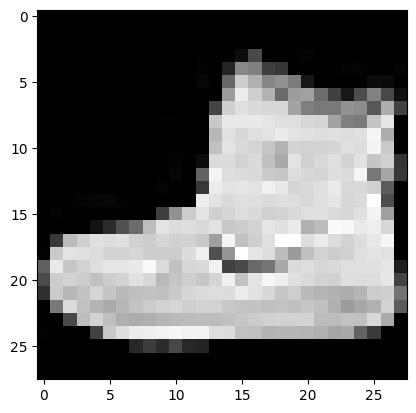

In [31]:
#Showing the image
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
plt.show

In [36]:
#Building an MLP classifier using a Sequential Model from Keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [38]:
#Model Training
model_history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.7133 - accuracy: 0.7672 - val_loss: 0.5242 - val_accuracy: 0.8122
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4875 - accuracy: 0.8309 - val_loss: 0.5143 - val_accuracy: 0.8087
Epoch 3/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4420 - accuracy: 0.8462 - val_loss: 0.4265 - val_accuracy: 0.8463
Epoch 4/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4148 - accuracy: 0.8546 - val_loss: 0.4291 - val_accuracy: 0.8443
Epoch 5/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3936 - accuracy: 0.8611 - val_loss: 0.3960 - val_accuracy: 0.8572
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3770 - accuracy: 0.8665 - val_loss: 0.4125 - val_accuracy: 0.8565
Epoch 7/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3649 - accuracy: 0.8717 - val_loss: 0.3957 - val_accuracy:

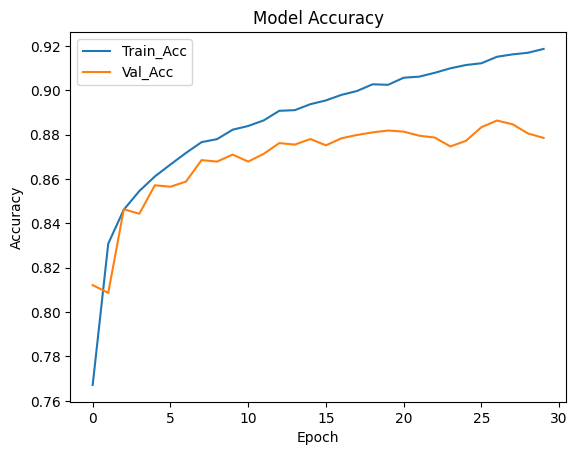

In [49]:
#Visualising Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train_Acc', 'Val_Acc'], loc='upper left')
plt.show()

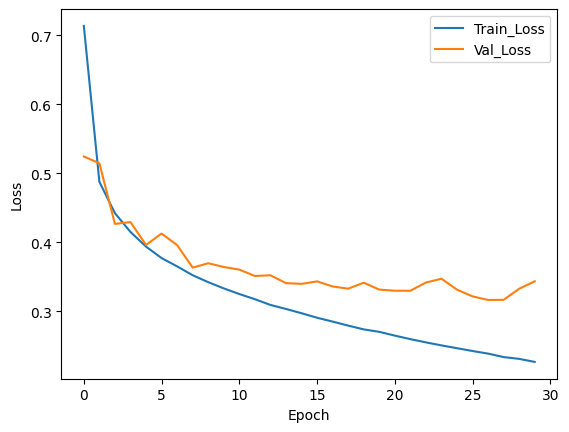

In [55]:
#Visualising Training and Validation Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train_Loss', 'Val_Loss'], loc='upper right')

In [57]:
#Evaluating the model on the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3567 - accuracy: 0.8726


[0.3566854000091553, 0.8726000189781189]